Excerise 1

In [61]:
import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.decomposition import PCA 
import pandas as pd 
import math 
import random
from sklearn import datasets
iris = datasets.load_iris()
iris.data.shape

(150, 4)

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data,
iris.target, random_state=0)
print(X_train.shape, X_test.shape)

(112, 4) (38, 4)


In [63]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [64]:
from sklearn import metrics
y_pred = gnb.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



Excerise 2

In [65]:
import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.decomposition import PCA 
import pandas as pd 
import math 
import random
from sklearn import datasets
iris = datasets.load_iris()
iris.data.shape

(150, 4)

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data,
iris.target, random_state=0)
print(X_train.shape, X_test.shape)

(112, 4) (38, 4)


In [67]:
X_train_p = X_train - np.mean(X_train)
X_test_p = X_test - np.mean(X_test)

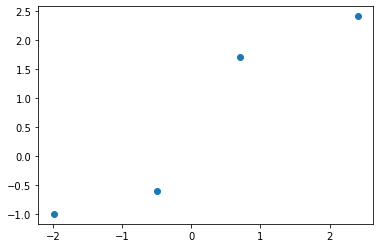

In [68]:
data = pd.DataFrame({'x': X_train_p[0], 'y': X_test_p[0]}) 
plt.scatter(data.x, data.y)

In [69]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=4, whiten=True)
pcaTr= pca.fit(X_train)

In [70]:
print(pca.components_.shape)

(4, 4)


In [71]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(112, 4)


In [72]:
print(X_test_pca.shape)

(38, 4)


In [73]:
rotatedData = pcaTr.transform(X_train)

In [74]:
dataPCA = pd.DataFrame(data = rotatedData, columns = ['PC1', 'PC2','PC3','PC4'])

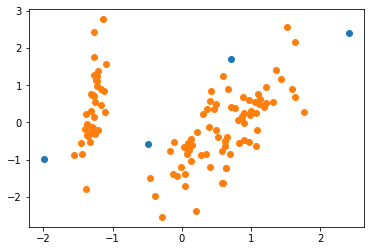

In [75]:
plt.scatter(data.x, data.y)
plt.scatter(dataPCA.PC1, dataPCA.PC2)
plt.show()

In [76]:
print('Eigenvectors or principal component: First row must be in the direction of [1, n]')
print(pcaTr.components_)
print()
print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)
std1 = 1
std2 = 0.333

Eigenvectors or principal component: First row must be in the direction of [1, n]
[[ 0.37649644 -0.06637905  0.85134571  0.35924188]
 [ 0.6240207   0.75538031 -0.18479376 -0.07648543]
 [-0.60667794  0.57674603  0.08522779  0.54040922]
 [ 0.31747515 -0.30390531 -0.48352659  0.75700273]]

Eigenvalues or explained variance
[4.45407391 0.25193059 0.07478621 0.0218018 ]


In [77]:
n=1
angle = np.arctan(1 / n) 
print('angle: ', angle * 180 / math.pi)
rotationMatrix = np.array([[np.cos(angle), np.sin(angle)],
[-np.sin(angle), np.cos(angle)]])

angle:  45.0


In [78]:
print('rotationMatrix')
print(rotationMatrix)

rotationMatrix
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


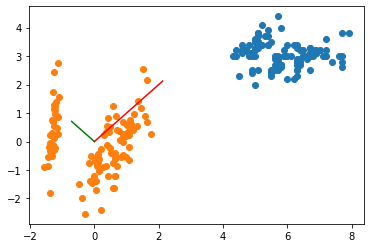

In [79]:
xy = np.concatenate(([X_train_p[0]] , [X_test_p[0]]), axis=0).T
data = np.dot(xy, rotationMatrix) 
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(dataPCA.PC1, dataPCA.PC2)
plt.plot([0, rotationMatrix[0][0] * std1 * 3], [0, rotationMatrix[0][1] * std1 * 3], 'k-', color='red')
plt.plot([0, rotationMatrix[1][0] * std2 * 3], [0, rotationMatrix[1][1] * std2 * 3], 'k-', color='green')
plt.show()

Observation: The rotation matrix used to create our correlated variables took the original uncorrelated variables x and y
and transformed them into the blue points.
The PCA transformation finds out the rotation matrix used to create our correlated variables (blue points).
Using the PCA model to transform our data, puts back the variables as our original uncorrelated variables.

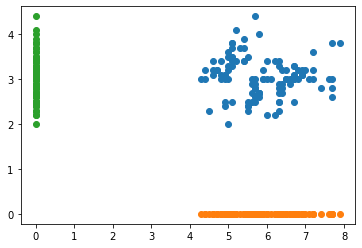

In [80]:
nPoints = len(X_train)
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(X_train[:,0], np.zeros(nPoints))
plt.scatter(np.zeros(nPoints), X_train[:,1])
plt.show()

Excerise 3

In [81]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)

GaussianNB()

In [82]:
from sklearn import metrics
y_pred = gnb.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      1.00      0.97        16
           2       1.00      0.89      0.94         9

    accuracy                           0.97        38
   macro avg       0.98      0.96      0.97        38
weighted avg       0.98      0.97      0.97        38



Observation: Using Naive bayes model along with PCA will improve the perfomance of naive bayes model.Although In some cases it will not affected much.